# Biodiversity in National Parks 

## Part I. Preparation

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import datasets
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

## Part II. Explore the data

### 1. Summary statistics and general info for *observations* df

In [3]:
observations.info

<bound method DataFrame.info of                                scientific_name  \
0                           Vicia benghalensis   
1                               Neovison vison   
2                            Prunus subcordata   
3                         Abutilon theophrasti   
4                     Githopsis specularioides   
...                                        ...   
23291                     Croton monanthogynus   
23292                 Otospermophilus beecheyi   
23293  Heterotheca sessiliflora ssp. echioides   
23294                     Dicranella rufescens   
23295                           Cucurbita pepo   

                                 park_name  observations  
0      Great Smoky Mountains National Park            68  
1      Great Smoky Mountains National Park            77  
2                   Yosemite National Park           138  
3                      Bryce National Park            84  
4      Great Smoky Mountains National Park            85  
...          

In [5]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [6]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [29]:
observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [10]:
observations.count()

scientific_name    23296
park_name          23296
observations       23296
dtype: int64

### 2. Summary statistics and general info for *species* df

In [4]:
species.info

<bound method DataFrame.info of             category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  
0                              Gapper's Red-Backed Vole                 NaN  
1                                 American Bison, Bison                 NaN  
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 N

In [7]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [28]:
species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [9]:
species.count()

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [12]:
maxRows = species['category'].count()
 
print('% Missing Data:')
print((1 - species.count() / maxRows) * 100)

% Missing Data:
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64


In [13]:
species['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

### 3. What is the distribution of conservation_status for animals?

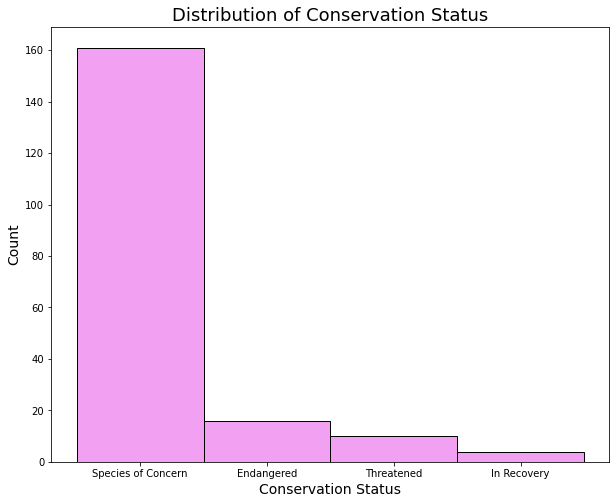

In [27]:
plt.figure (figsize=[10,8])
sns.histplot(x=species['conservation_status'], color = 'violet')
plt.xlabel('Conservation Status', size=14)
plt.ylabel('Count', size=14)
plt.title('Distribution of Conservation Status', size=18)
plt.show()

### 4. Are certain types of species more likely to be endangered?

In [137]:
df = species.groupby(['category', 'conservation_status']).count().reset_index()

In [138]:
df = pd.DataFrame(data=df)

In [139]:
df = df[['category', 'conservation_status', 'scientific_name']]
df

,category,conservation_status,scientific_name
0,Amphibian,Endangered,1
1,Amphibian,Species of Concern,4
2,Amphibian,Threatened,2
3,Bird,Endangered,4
4,Bird,In Recovery,3
5,Bird,Species of Concern,72
6,Fish,Endangered,3
7,Fish,Species of Concern,4
8,Fish,Threatened,4
9,Mammal,Endangered,7


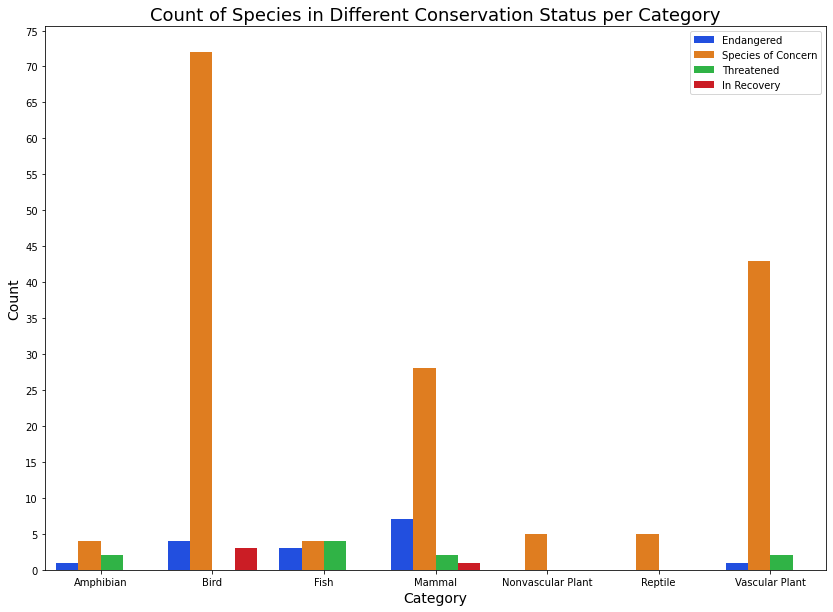

In [166]:
plt.figure (figsize=[14,10])
sns.barplot(data=df, x='category', y='scientific_name', hue='conservation_status', palette='bright')
plt.title('Count of Species in Different Conservation Status per Category', size=18)
plt.yticks(range(0,80,5))
plt.xlabel('Category', size=14)
plt.ylabel('Count', size=14)
plt.legend(loc='upper right')
plt.show()

### 5. Which species were spotted the most at each park?

In [182]:
df = observations.groupby(['scientific_name', 'park_name']).max()

In [191]:
observations.groupby('park_name').max()

,scientific_name,observations
park_name,,
Bryce National Park,Zygodon viridissimus var. rupestris,176
Great Smoky Mountains National Park,Zygodon viridissimus var. rupestris,147
Yellowstone National Park,Zygodon viridissimus var. rupestris,321
Yosemite National Park,Zygodon viridissimus var. rupestris,223


In [181]:
df.sort('observations')

AttributeError: 'DataFrame' object has no attribute 'sort'

In [168]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)